In [49]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
import matplotlib.colors as mcolors

In [39]:
#%%script false --no-raise-error
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
%config InLineBackend.figure_format = 'retina'
%config InLineBackend.savefig_format = 'pdf'
print('Retina screen activated')

Retina screen activated


In [41]:
weights_noreg = np.load('results_dictionary_learning_eco/46n_23a_noreg/weights.npy')
weights_reg = np.load('results_dictionary_learning_eco/46n_23a_reg/weights.npy')
weights_reg_sparse = np.load('results_dictionary_learning_eco/46n_23a_reg_sparse2/weights.npy')

In [42]:
weight_noreg = weights_noreg[18].T
weight_reg = weights_reg[18].T
weight_reg_sparse = weights_reg_sparse[18].T

In [43]:
weight_noreg_pca = PCA(n_components=2).fit_transform(weight_noreg)
weight_reg_pca = PCA(n_components=2).fit_transform(weight_reg)
weight_reg_sparse_pca = PCA(n_components=2).fit_transform(weight_reg_sparse)

In [44]:
weight_noreg_tsne = TSNE(n_components=2, perplexity=5, learning_rate=10, max_iter=3000, random_state=42).fit_transform(weight_noreg)
weight_reg_tsne = TSNE(n_components=2, perplexity=5, learning_rate=10, max_iter=3000, random_state=42).fit_transform(weight_reg)
weight_reg_sparse_tsne = TSNE(n_components=2, perplexity=5, learning_rate=10, max_iter=3000, random_state=42).fit_transform(weight_reg_sparse)

In [45]:
weight_noreg_mds = MDS(n_components=2, random_state=42).fit_transform(weight_noreg)
weight_reg_mds = MDS(n_components=2, random_state=42).fit_transform(weight_reg)
weight_reg_sparse_mds = MDS(n_components=2, random_state=42).fit_transform(weight_reg_sparse)

In [81]:
labels_noreg = np.load('results_aglo_nodes/results_eco/46n_23a_noreg/labels/labels_5.npy')
labels_reg = np.load('results_aglo_nodes/results_eco/46n_23a_reg/labels/labels_5.npy')
labels_reg_sparse = np.load('results_aglo_nodes/results_eco/46n_23a_reg_sparse2/labels/labels_5.npy')

In [82]:
color_palette = list(mcolors.TABLEAU_COLORS.values()) + list(mcolors.CSS4_COLORS.values())
colors_noreg = {i: color_palette[i % len(color_palette)] for i in range(len(set(labels_noreg)))}
colors_reg = {i: color_palette[i % len(color_palette)] for i in range(len(set(labels_reg)))}
colors_reg_sparse = {i: color_palette[i % len(color_palette)] for i in range(len(set(labels_reg_sparse)))}

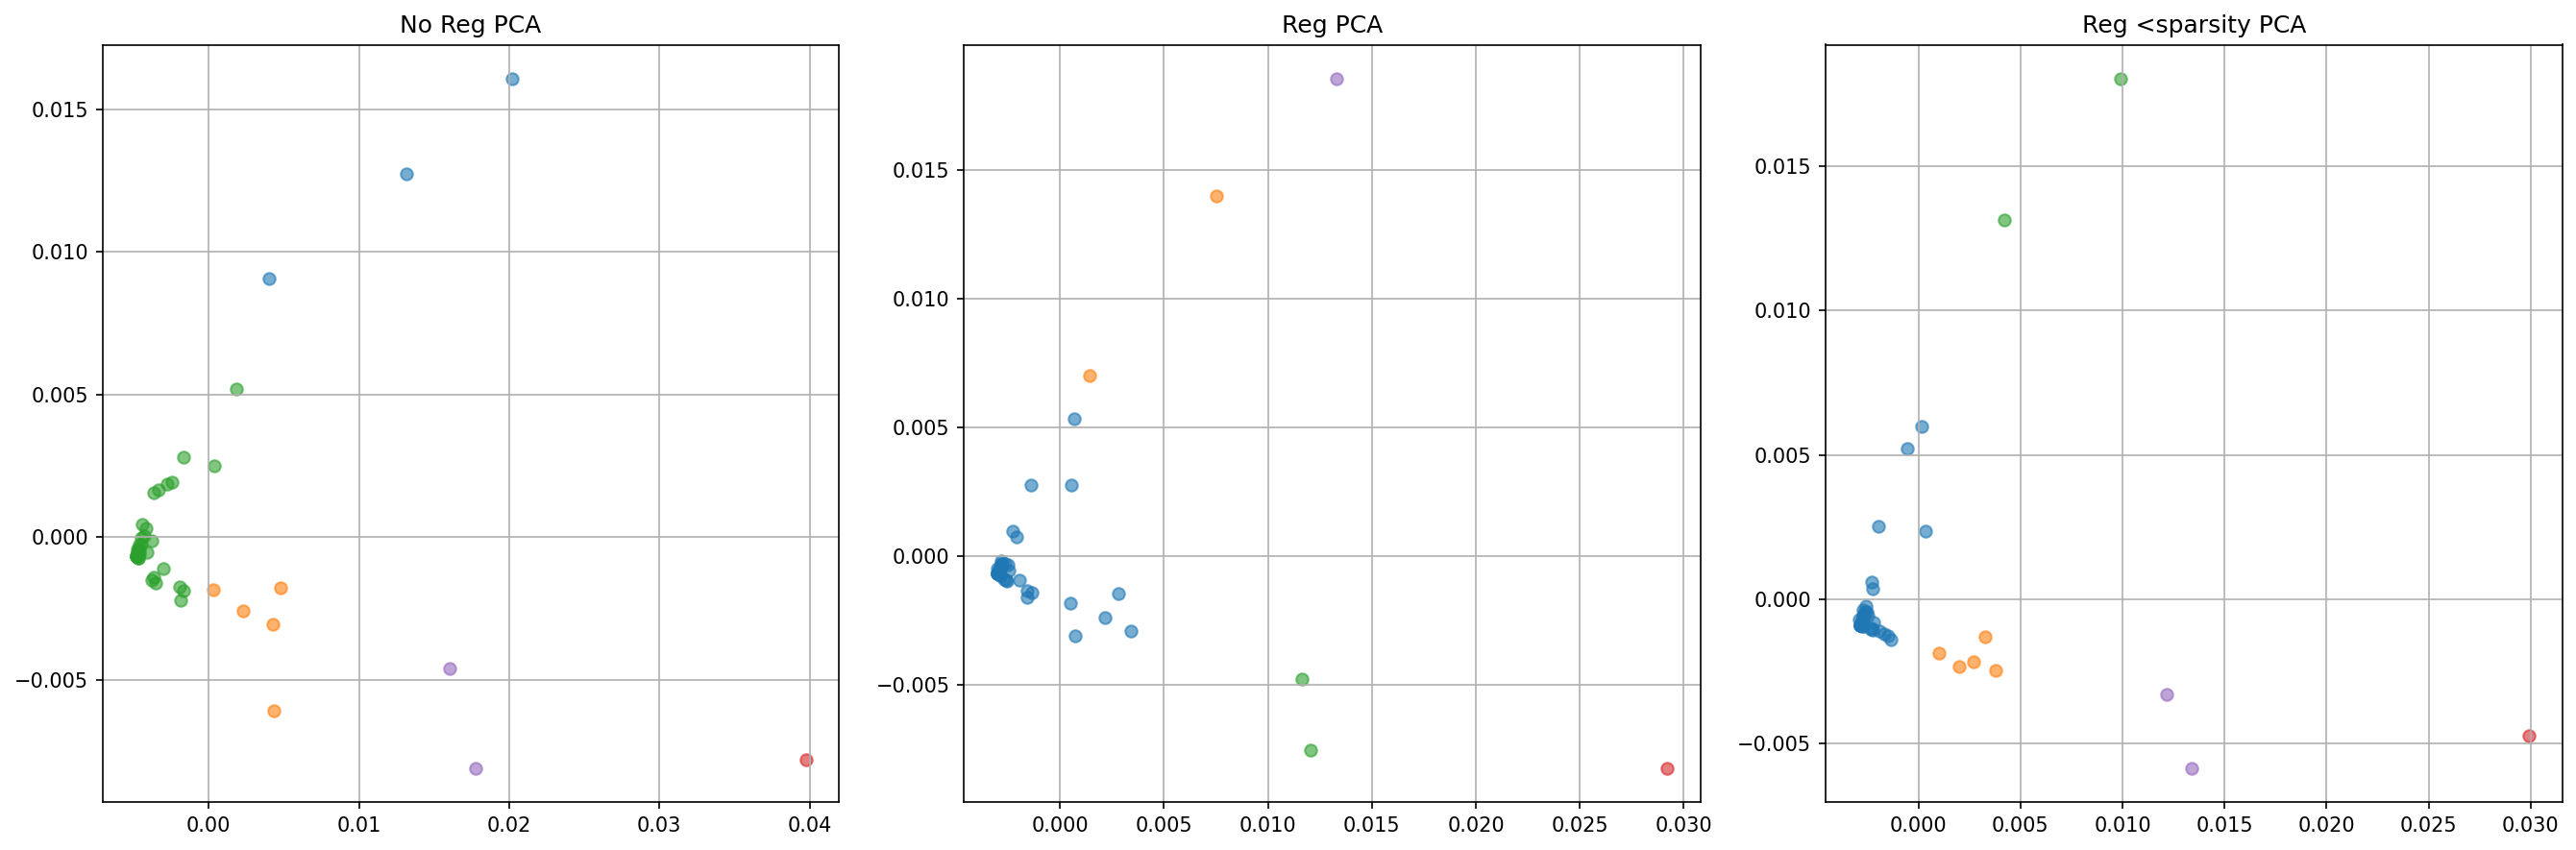

In [83]:
plt.figure(figsize=(18, 6))
plt.subplot(131)
for i in range(len(set(labels_noreg))):
    plt.scatter(weight_noreg_pca[labels_noreg == i, 0], weight_noreg_pca[labels_noreg == i, 1], c=colors_noreg[i], alpha=0.6)
plt.title('No Reg PCA')
plt.grid()
plt.subplot(132)
for i in range(len(set(labels_reg))):
    plt.scatter(weight_reg_pca[labels_reg == i, 0], weight_reg_pca[labels_reg == i, 1], c=colors_reg[i], alpha=0.6)
plt.title('Reg PCA')
plt.grid()
plt.subplot(133)
for i in range(len(set(labels_reg_sparse))):
    plt.scatter(weight_reg_sparse_pca[labels_reg_sparse == i, 0], weight_reg_sparse_pca[labels_reg_sparse == i, 1], c=colors_reg_sparse[i], alpha=0.6)
plt.title('Reg <sparsity PCA')
plt.grid()
plt.tight_layout()

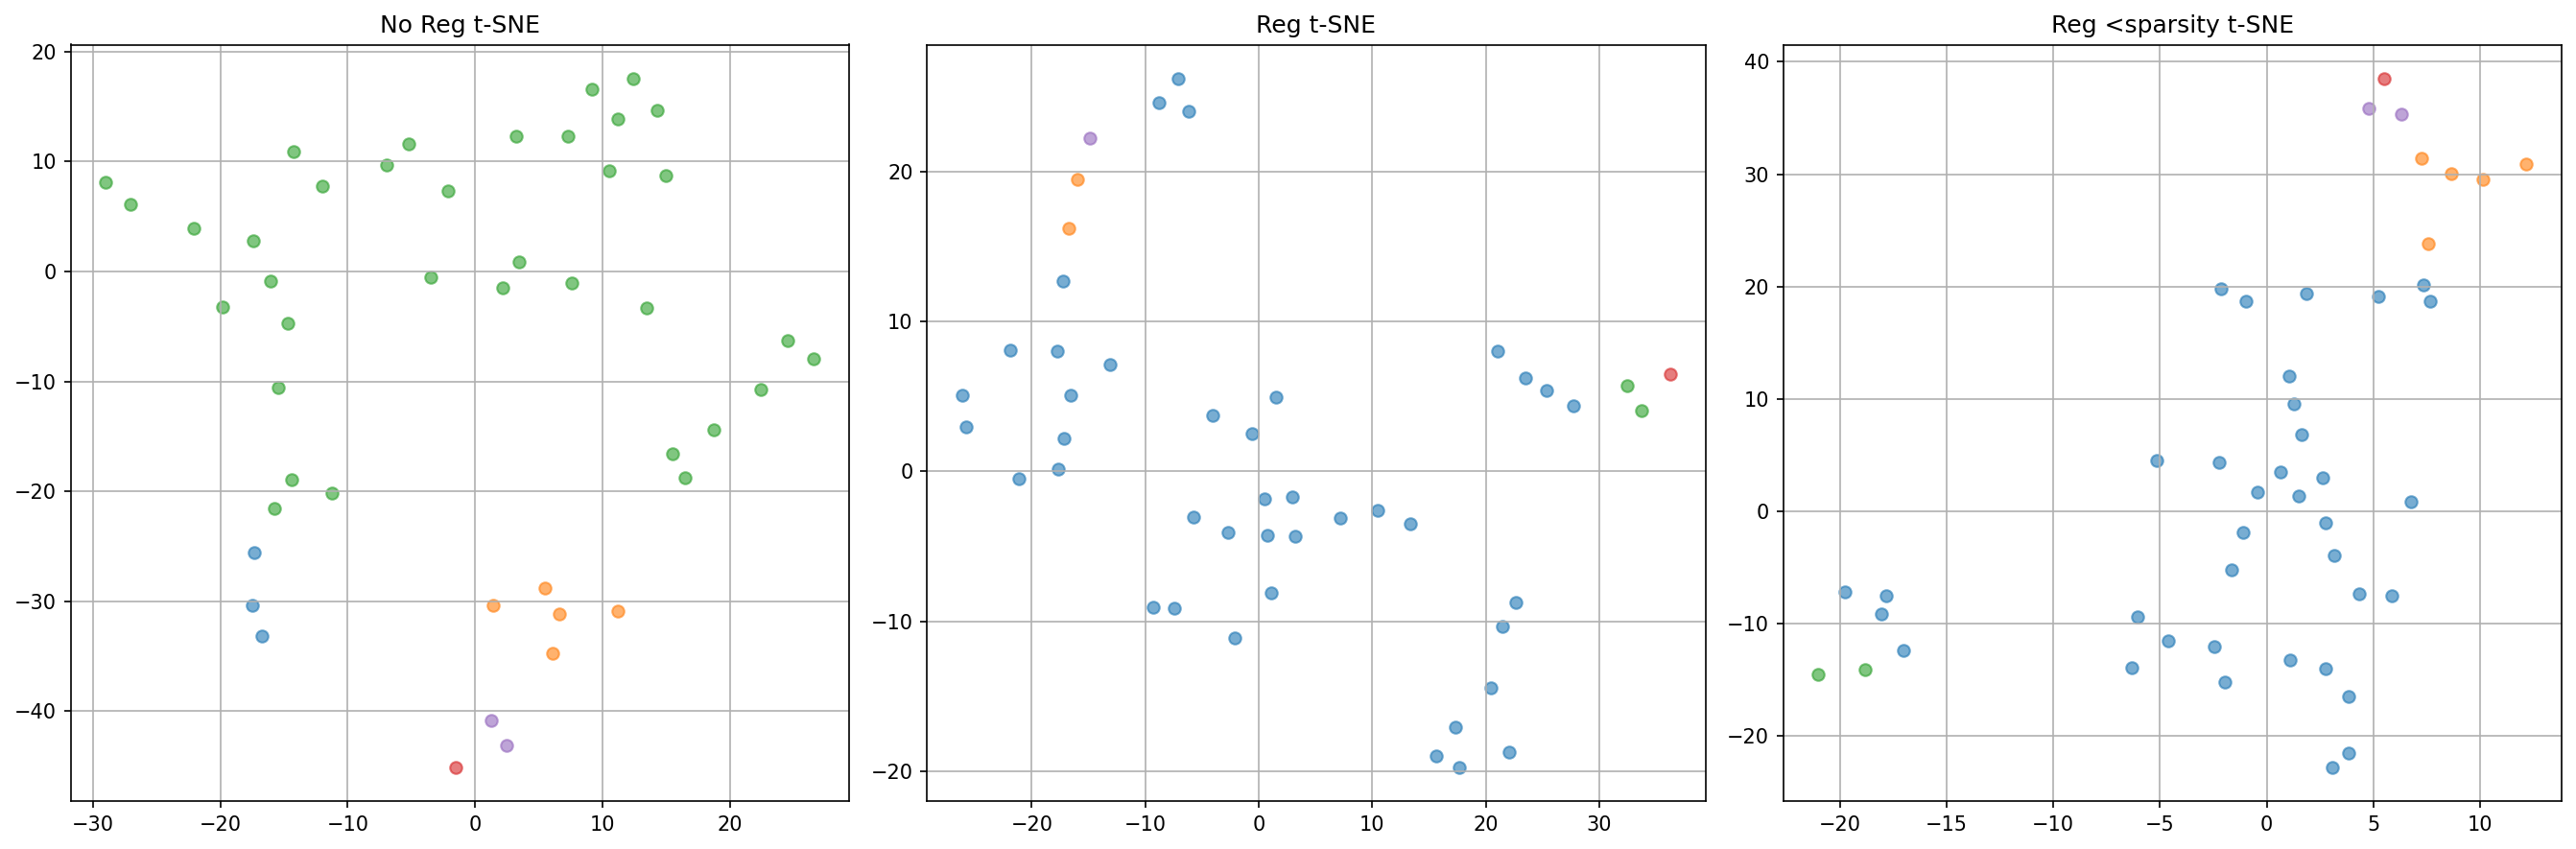

In [84]:
plt.figure(figsize=(18, 6))
plt.subplot(131)
for i in range(len(set(labels_noreg))):
    plt.scatter(weight_noreg_tsne[labels_noreg == i, 0], weight_noreg_tsne[labels_noreg == i, 1], c=colors_noreg[i], alpha=0.6)
plt.title('No Reg t-SNE')
plt.grid()
plt.subplot(132)
for i in range(len(set(labels_reg))):
    plt.scatter(weight_reg_tsne[labels_reg == i, 0], weight_reg_tsne[labels_reg == i, 1], c=colors_reg[i], alpha=0.6)
plt.title('Reg t-SNE')
plt.grid()
plt.subplot(133)
for i in range(len(set(labels_reg_sparse))):
    plt.scatter(weight_reg_sparse_tsne[labels_reg_sparse == i, 0], weight_reg_sparse_tsne[labels_reg_sparse == i, 1], c=colors_reg_sparse[i], alpha=0.6)
plt.title('Reg <sparsity t-SNE')
plt.grid()
plt.tight_layout()

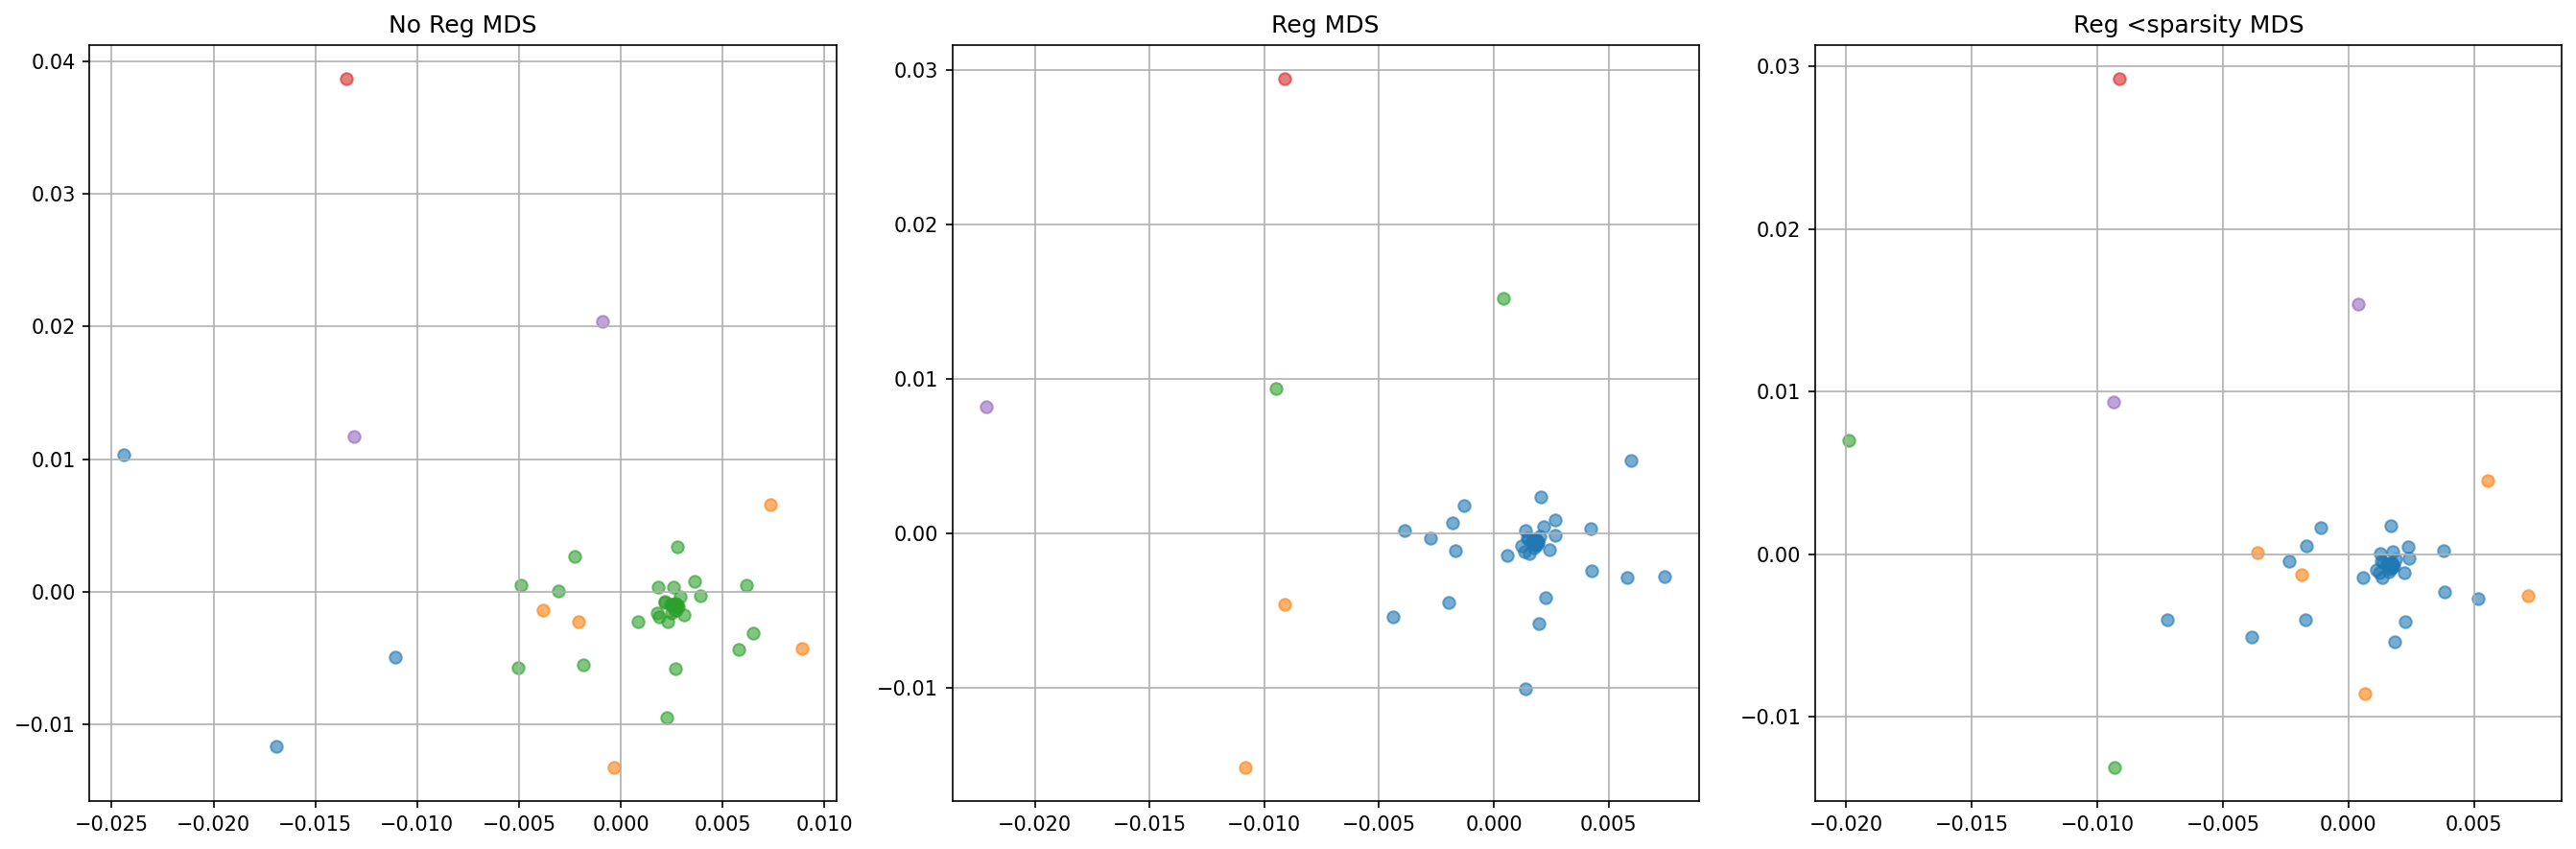

In [85]:
plt.figure(figsize=(18, 6))
plt.subplot(131)
for i in range(len(set(labels_noreg))):
    plt.scatter(weight_noreg_mds[labels_noreg == i, 0], weight_noreg_mds[labels_noreg == i, 1], c=colors_noreg[i], alpha=0.6)
plt.title('No Reg MDS')
plt.grid()
plt.subplot(132)
for i in range(len(set(labels_reg))):
    plt.scatter(weight_reg_mds[labels_reg == i, 0], weight_reg_mds[labels_reg == i, 1], c=colors_reg[i], alpha=0.6)
plt.title('Reg MDS')
plt.grid()
plt.subplot(133)
for i in range(len(set(labels_reg_sparse))):
    plt.scatter(weight_reg_sparse_mds[labels_reg_sparse == i, 0], weight_reg_sparse_mds[labels_reg_sparse == i, 1], c=colors_reg_sparse[i], alpha=0.6)
plt.title('Reg <sparsity MDS')
plt.grid()
plt.tight_layout()